## CONFIRMING ODVG FORMAT DATA CONSISTENCY


In [6]:
import json
from collections import Counter

path = "../dataset/kitti/training/train_grounding.json"
with open(path) as f:
    data = json.load(f)

print(f"Images: {len(data['images'])}")
print(f"Annotations: {len(data['annotations'])}")
print(f"Categories: {data['categories']}")


Images: 5043
Annotations: 22322
Categories: [{'id': 1, 'name': 'car'}, {'id': 2, 'name': 'pedestrian'}]


In [7]:
counts = Counter([ann["category_id"] for ann in data["annotations"]])
id_to_name = {c["id"]: c["name"] for c in data["categories"]}
print({id_to_name[k]: v for k, v in counts.items()})


{'car': 19781, 'pedestrian': 2541}


In [8]:
import random
import cv2

sample = random.choice(data["annotations"])
img_info = next(i for i in data["images"] if i["id"] == sample["image_id"])
print(img_info)
print(sample)


{'id': 2329, 'file_name': '0007/000469.png', 'height': 0, 'width': 0, 'caption': 'car . pedestrian .', 'tokens_positive': [[0, 0], [2, 2]], 'positive_categories': ['car', 'pedestrian']}
{'id': 10432, 'image_id': 2329, 'bbox': [692.617983, 181.053967, 92.65415200000007, 65.177021], 'area': 6038.921610641196, 'iscrowd': 0, 'category_id': 1, 'text': 'car', 'tokens_positive': [[0, 0]]}


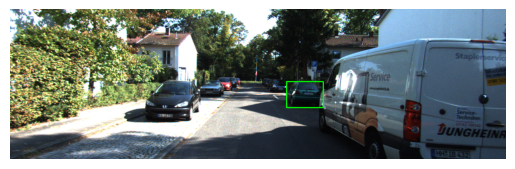

In [9]:
import cv2
import matplotlib.pyplot as plt

img_path = f"../dataset/kitti/training/image_02/{img_info['file_name']}"
img = cv2.imread(img_path)
x, y, w, h = map(int, sample["bbox"])
cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Convert BGR → RGB for correct colors
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


In [11]:
from collections import defaultdict
frames_per_seq = defaultdict(int)
for img in data["images"]:
    seq = img["file_name"].split("/")[0]
    frames_per_seq[seq] += 1

print(f"Total sequences: {len(frames_per_seq)}")
print("Frames per sequence (first 10):")

for i, (seq, count) in enumerate(frames_per_seq.items()):
    print(f"  Sequence {seq}: {count} frames")
    if i == 9:
        break

# Optional: average frames per sequence
avg_frames = sum(frames_per_seq.values()) / len(frames_per_seq)
print(f"\nAverage frames per sequence: {avg_frames:.2f}")

Total sequences: 15
Frames per sequence (first 10):
  Sequence 0000: 154 frames
  Sequence 0001: 447 frames
  Sequence 0002: 233 frames
  Sequence 0003: 144 frames
  Sequence 0004: 314 frames
  Sequence 0005: 297 frames
  Sequence 0006: 270 frames
  Sequence 0007: 800 frames
  Sequence 0008: 390 frames
  Sequence 0009: 803 frames

Average frames per sequence: 336.20
